# Surprise - Housing Case Study

##  Importing and Understanding Data

Let's first import the required libraries and have a look at the dataset and understand the size, attribute names etc.

In [1]:
#Importing all the neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading dataset from csv file
data = pd.read_csv('train.csv')

#Getting top 10 rows from dataframe 
data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [3]:
# Looking at the missing values/datatypes/Shape of dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
#Looking at the statistical summary
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
#Dropping id column as it won't be useful for our analysis
data = data.drop(columns = ['Id'],axis=1)

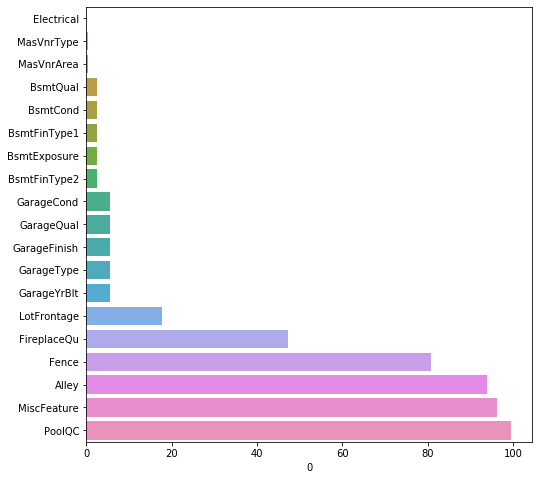

In [6]:
#plotting the columns having null values
plt.figure(figsize=[8,8])
null_values=pd.DataFrame(100*data.isnull().sum()/len(data.index))
null_values=null_values[null_values[0]>0].sort_values(by=0)
sns.barplot(data=null_values,x=0,y=null_values.index)

In [7]:
#Setting number of rows to be displayed as 100
pd.set_option('display.max_rows', 100)

## Data Cleaning

In [8]:
#Counting columns with any NULL values
round((data.isnull().sum()/len(data.index))*100,2)

MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF          0.00
2ndFlrSF   

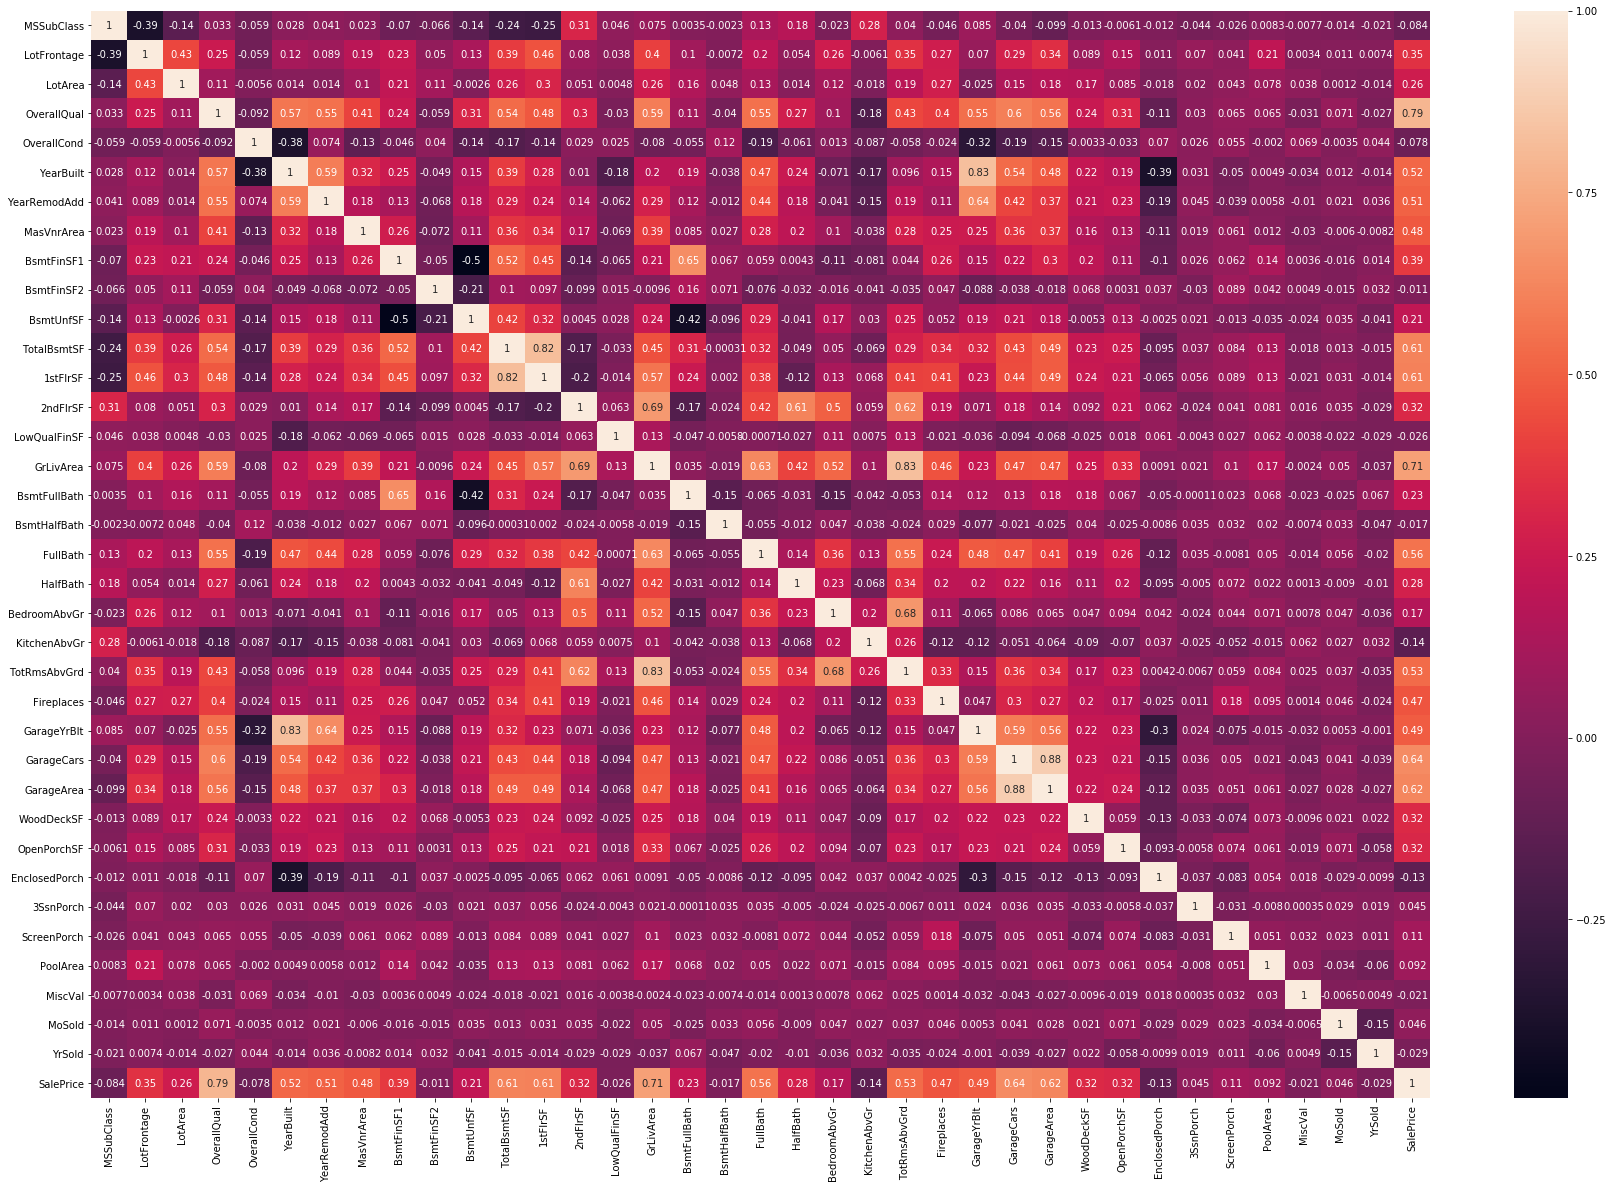

In [9]:
#correlation matrix
plt.figure(figsize=(30,20))
sns.heatmap(data.corr(),annot=True)

<b>Observations:</b>
    1. GarageYrBlt and YearBuilt are highly positively correlated
    2. GrLivArea and TotRmsAbvGrd are highly positively correlated
    3. EnclosedPorch and YearBuilt are higly negatively correlated
    4. GarageCars and GarageArea are highly positively correlated

It can be observed that for some categorical columns NA actually is a valid value. So, replacing them according to the dictionary.

In [10]:
data['Alley'] = data['Alley'].fillna('No alley access')
data['BsmtQual'] = data['BsmtQual'].fillna('No Basement')
data['BsmtCond'] = data['BsmtCond'].fillna('No Basement')
data['BsmtExposure'] = data['BsmtExposure'].fillna('No Basement')
data['BsmtFinType1'] = data['BsmtFinType1'].fillna('No Basement')
data['BsmtFinType2'] = data['BsmtFinType2'].fillna('No Basement')
data['FireplaceQu'] = data['FireplaceQu'].fillna('No Fireplace')
data['GarageType'] = data['GarageType'].fillna('No Garage')
data['GarageFinish'] = data['GarageFinish'].fillna('No Garage')
data['GarageQual'] = data['GarageQual'].fillna('No Garage')
data['GarageCond'] = data['GarageCond'].fillna('No Garage')
data['PoolQC'] = data['PoolQC'].fillna('No Pool')
data['Fence'] = data['Fence'].fillna('No Fence')
data['MiscFeature'] = data['MiscFeature'].fillna('None')
data['PoolQC'] = data['PoolQC'].fillna('No Pool')

In [11]:
#Dropping columns having more than 30% missing values.
data_cols = data.columns[(data.isnull().sum()/len(data.index))>0.30]
data = data.drop(data_cols,axis=1)

In [12]:
round(100*(data.isnull().sum()/len(data.index)),4)

MSSubClass        0.0000
MSZoning          0.0000
LotFrontage      17.7397
LotArea           0.0000
Street            0.0000
Alley             0.0000
LotShape          0.0000
LandContour       0.0000
Utilities         0.0000
LotConfig         0.0000
LandSlope         0.0000
Neighborhood      0.0000
Condition1        0.0000
Condition2        0.0000
BldgType          0.0000
HouseStyle        0.0000
OverallQual       0.0000
OverallCond       0.0000
YearBuilt         0.0000
YearRemodAdd      0.0000
RoofStyle         0.0000
RoofMatl          0.0000
Exterior1st       0.0000
Exterior2nd       0.0000
MasVnrType        0.5479
MasVnrArea        0.5479
ExterQual         0.0000
ExterCond         0.0000
Foundation        0.0000
BsmtQual          0.0000
BsmtCond          0.0000
BsmtExposure      0.0000
BsmtFinType1      0.0000
BsmtFinSF1        0.0000
BsmtFinType2      0.0000
BsmtFinSF2        0.0000
BsmtUnfSF         0.0000
TotalBsmtSF       0.0000
Heating           0.0000
HeatingQC         0.0000


In [13]:
#Replacing the Nan's with their corresponding means in continous columns - LotFrontage
cols_mean = ['LotFrontage']
data[cols_mean]=data[cols_mean].fillna(data.mean())

In [14]:
#Replacing the Nan's with their corresponding modes in few categorical columns
cols_mode = ['GarageYrBlt','Electrical','MasVnrArea','MasVnrType']
data[cols_mode]=data[cols_mode].fillna(data.mode().iloc[0])

In [15]:
#No missing values present
round(100*(data.isnull().sum()/len(data.index)),4)

MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
Alley            0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath     0.0
BsmtHalfBath 

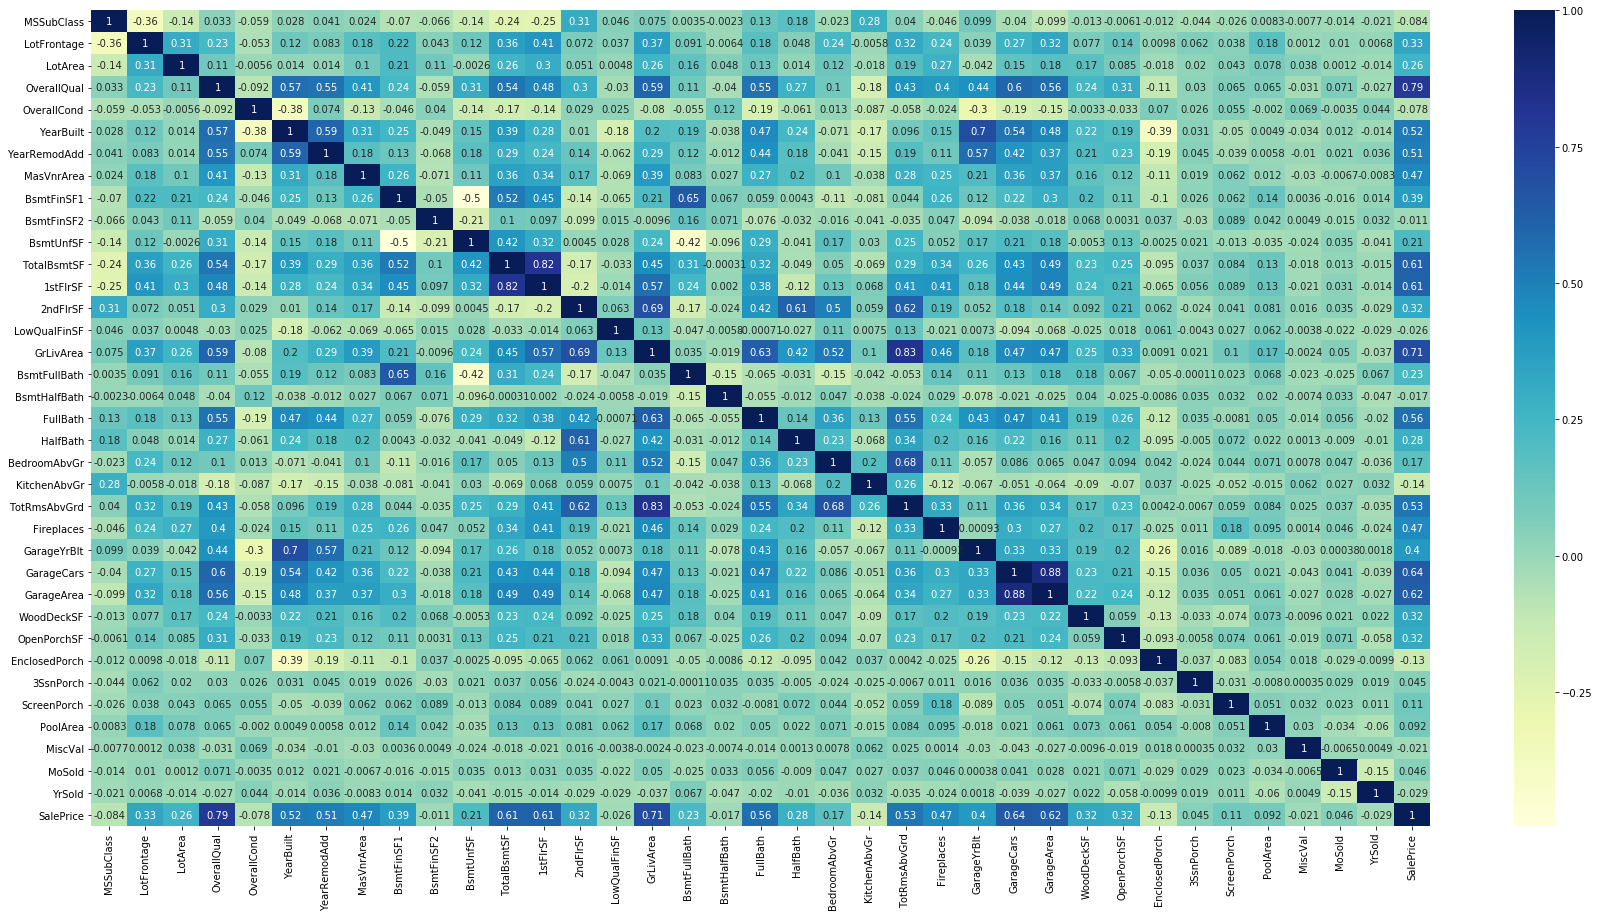

In [16]:
# plotting correlations on a heatmap
# figure size
plt.figure(figsize=(30,15))
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()

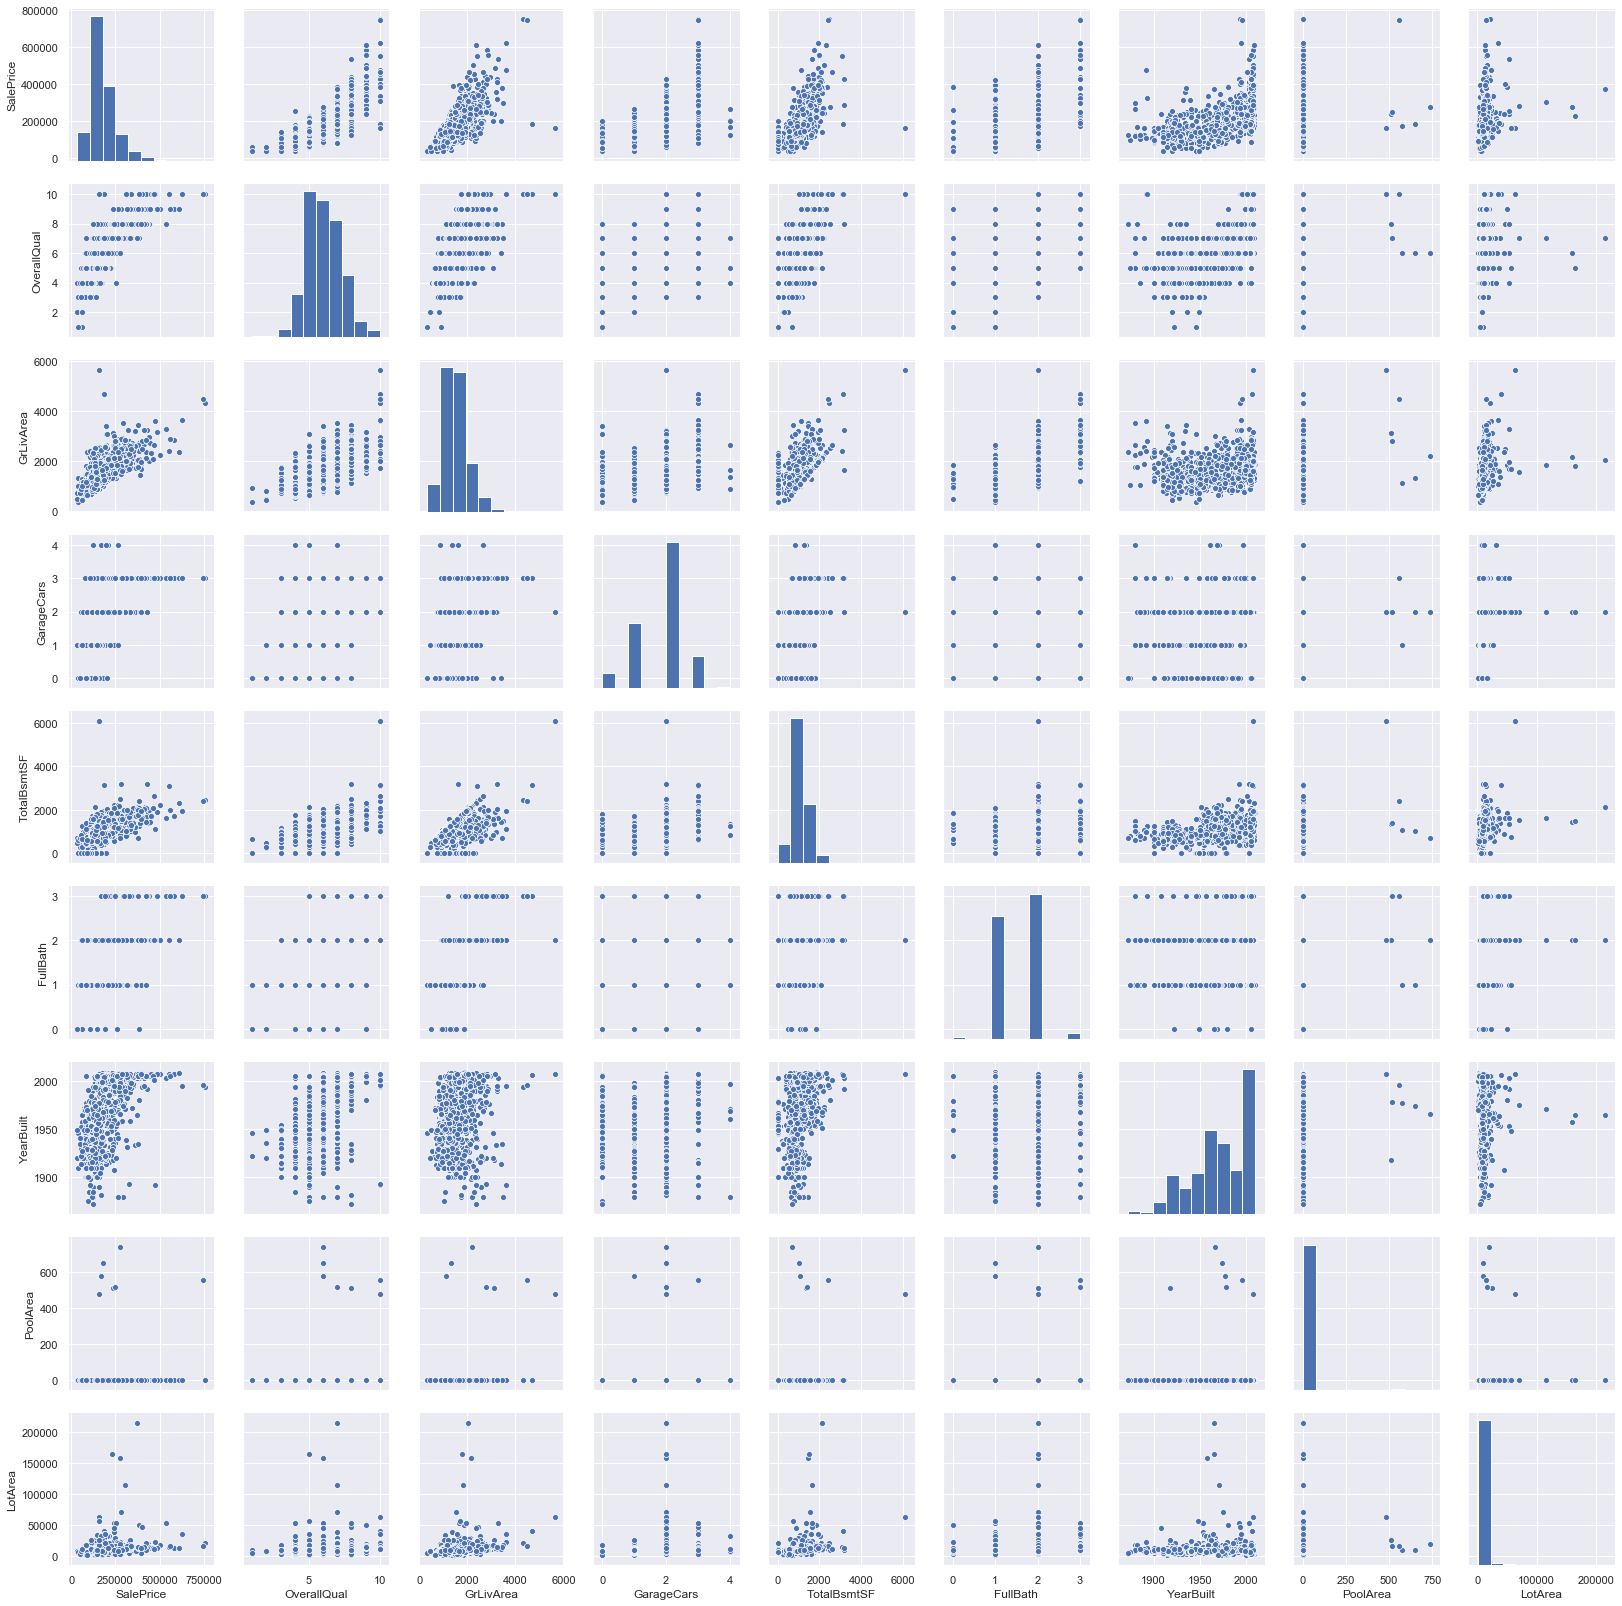

In [17]:
#scatterplot for few columns
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt','PoolArea','LotArea']
sns.pairplot(data[cols], size = 2.5)
plt.show();

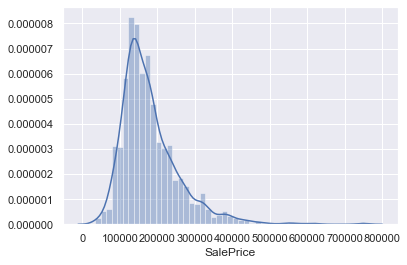

In [18]:
#Checking whether target variable is normally distributed or not
sns.distplot(data['SalePrice'])

In [19]:
#Checking the Skewness and Kurtosis of the target variable column
print("Skewness: %f" % data['SalePrice'].skew())
print("Kurtosis: %f" % data['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


*The column SalePrice is right-skewed . There are high number of property having range 10k-25k. So, tranforming the target variable using Box-Cox Transformation.*

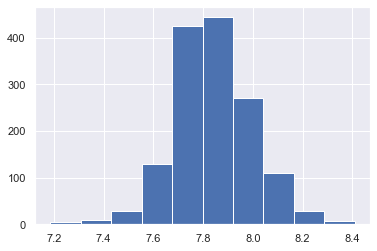

In [20]:
from scipy import stats
import pylab 
x = data['SalePrice']
x_bc, lmda = stats.boxcox(x)
pd.Series(x_bc).hist()
plt.show()

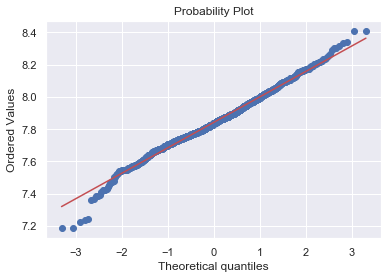

lambda parameter for Box-Cox Transformation is -0.07692396374428875


In [21]:
stats.probplot(x_bc, dist="norm", plot=pylab)
pylab.show()
print("lambda parameter for Box-Cox Transformation is {}".format(lmda))

In [22]:
#Tranforming the target variable SalePrice and stroing the tranformed value in the new column TranformedPrice
data["TransformedPrice"] = np.log(data["SalePrice"])

In [23]:
data = data.drop(columns=['SalePrice'],axis=1)

# Data Preparation

In [24]:
# Making list of numerical columns from Analysis point of view
numerical_column = data.select_dtypes(include =['number'])

# Making list of categorical columns from Analysis point of view
categorical_column = list(data.select_dtypes(exclude='number').columns)

# Making list of Target/Output column from Analysis point of view
target_column = {'TransformedPrice'}

In [25]:
#Checking the statistical properties of the categorical columns in the dataframe
data[list(categorical_column)].describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,...,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460
unique,5,2,3,4,4,2,5,3,25,9,...,7,4,6,6,3,4,5,5,9,6
top,RL,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,No Pool,No Fence,None,WD,Normal
freq,1151,1454,1369,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,1453,1179,1406,1267,1198


In [26]:
#Checking the statistical properties of the numerical columns in the dataframe
data[list(numerical_column)].describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,TransformedPrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,12.024051
std,42.300571,22.024023,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,0.399452
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,10.460242
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,11.775097
50%,50.000000,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,12.001505
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,12.273731
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,13.534473


# Data Visualization - Exploratory Data Analysis

#### Univariate and Bivariate Analysis

In [27]:
#Defining Boxplot function for univariate analysis 
def num_col_univariate_analysis(c):
  plt.figure(figsize=(4, 4))
  ax = sns.boxplot(y=c, data=data)
  plt.show()

In [28]:
#Defining catplot function for univariate analysis
def cat_col_univariate_analysis(c):
  sns.catplot(y=c, data=data, kind="count")
  plt.show()

In [29]:
#Defining Boxplot function for bivariate analysis
def num_col_bivariate_analysis(c1,c2):
  plt.figure(figsize=(4, 4))
  ax = sns.boxplot(x=c1, y=c2, data=data)
  plt.show()

In [30]:
#Defining catplot function for bivariate analysis
def cat_col_bivariate_analysis(c1,c2):
  sns.catplot(col=c1 ,y=c2, data=data, kind="count")
  plt.show()

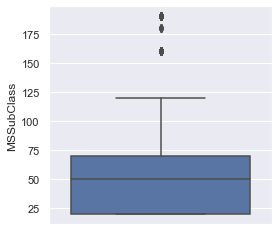

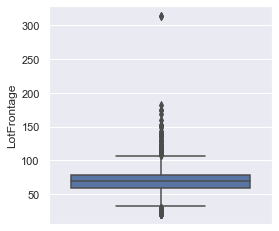

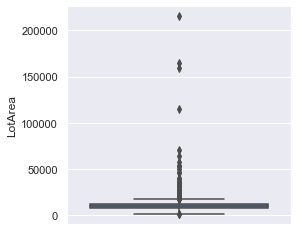

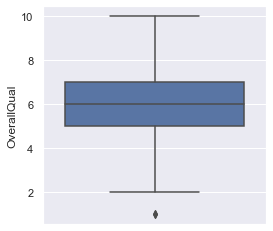

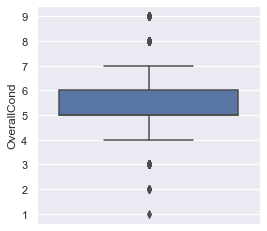

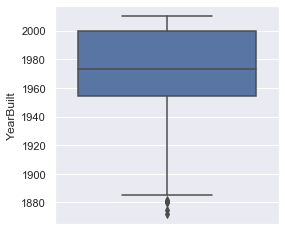

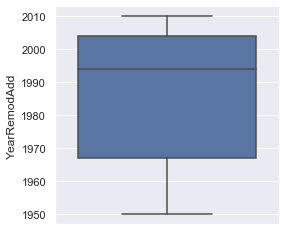

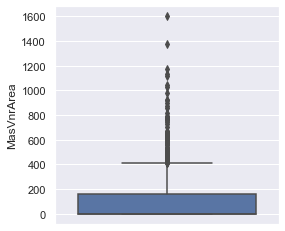

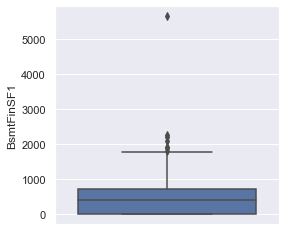

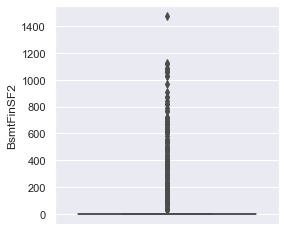

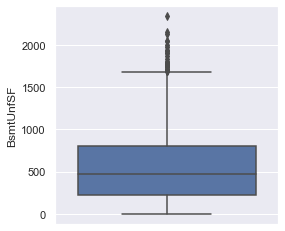

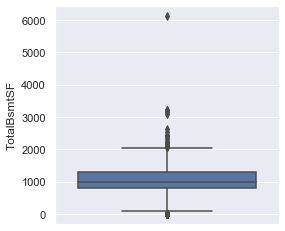

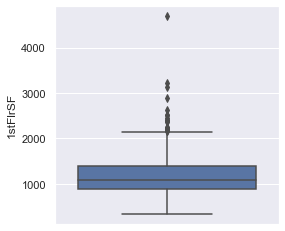

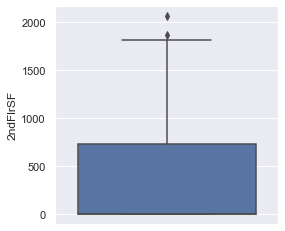

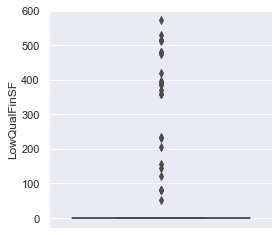

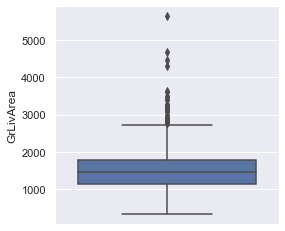

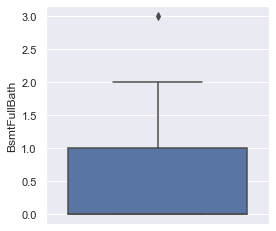

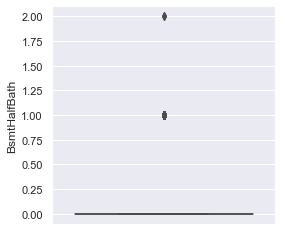

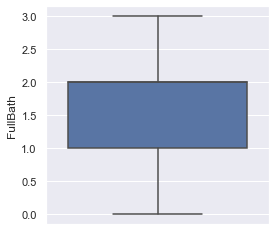

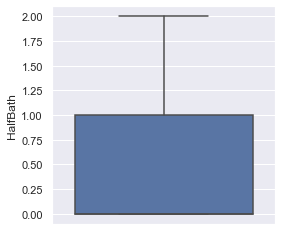

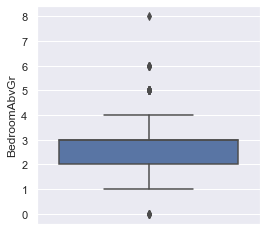

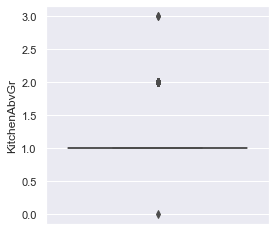

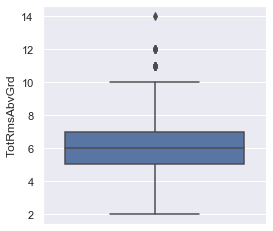

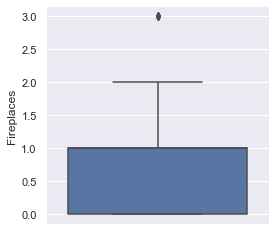

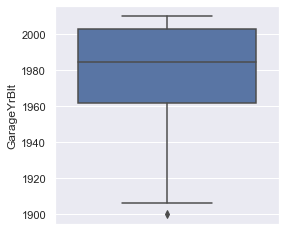

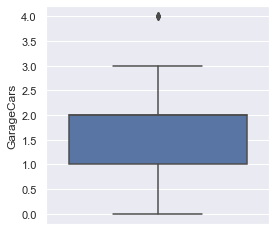

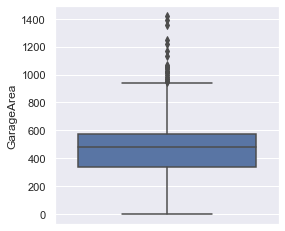

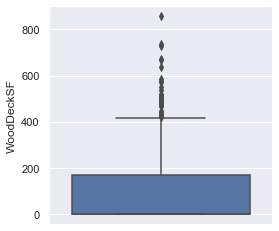

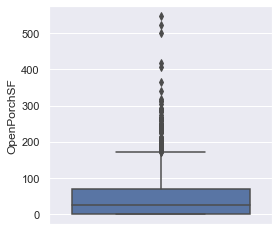

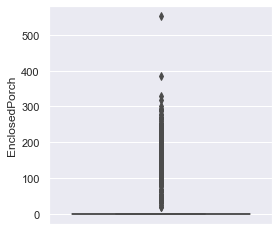

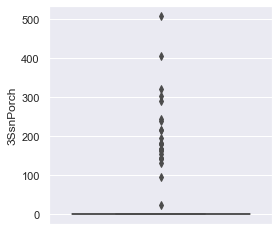

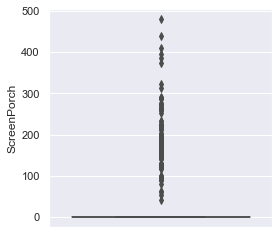

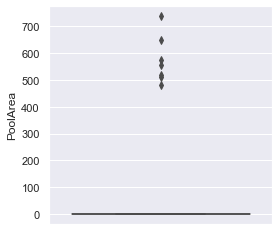

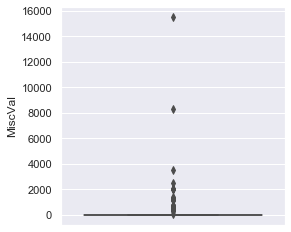

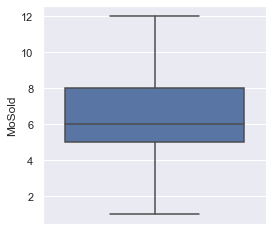

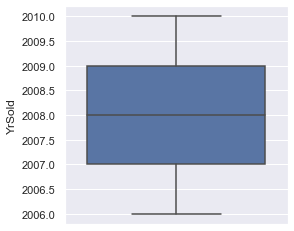

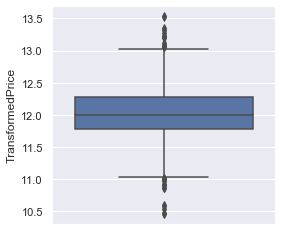

In [31]:
#Univariate Analysis of Numerical Columns
for c in numerical_column:
  num_col_univariate_analysis(c)

In [32]:
#Dropping outliers for Numerical Columns
data=data.loc[data['MSSubClass']<data['MSSubClass'].quantile(0.99)]
data=data.loc[data['LotFrontage']<data['LotFrontage'].quantile(0.99)]
data=data.loc[data['LotArea']<data['LotArea'].quantile(0.99)]
data=data.loc[data['OverallQual']>data['OverallQual'].quantile(0.01)]
data=data.loc[data['OverallCond']<data['OverallCond'].quantile(0.99)]
data=data.loc[data['OverallCond']>data['OverallCond'].quantile(0.01)]
data=data.loc[data['YearBuilt']>data['YearBuilt'].quantile(0.01)]
data=data.loc[data['MasVnrArea']<data['MasVnrArea'].quantile(0.99)]
data=data.loc[data['BsmtFinSF1']<data['BsmtFinSF1'].quantile(0.99)]
data=data.loc[data['BsmtFinSF2']<data['BsmtFinSF2'].quantile(0.99)]
data=data.loc[data['BsmtUnfSF']<data['BsmtUnfSF'].quantile(0.99)]
data=data.loc[data['TotalBsmtSF']<data['TotalBsmtSF'].quantile(0.99)]
data=data.loc[data['1stFlrSF']<data['1stFlrSF'].quantile(0.99)]
data=data.loc[data['2ndFlrSF']<data['2ndFlrSF'].quantile(0.99)]
data=data.loc[data['GrLivArea']<data['GrLivArea'].quantile(0.99)]
data=data.loc[data['BsmtFullBath']<data['BsmtFullBath'].quantile(0.99)]
data=data.loc[data['BsmtHalfBath']<data['BsmtHalfBath'].quantile(0.99)]
data=data.loc[data['Fireplaces']<data['Fireplaces'].quantile(0.99)]
data=data.loc[data['GarageCars']<data['GarageCars'].quantile(0.99)]
data=data.loc[data['GarageYrBlt']>data['GarageYrBlt'].quantile(0.01)]

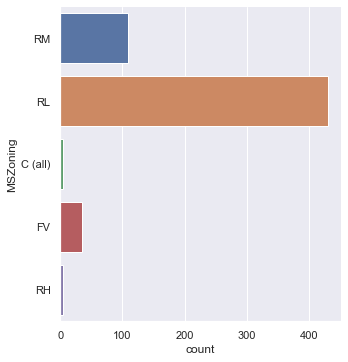

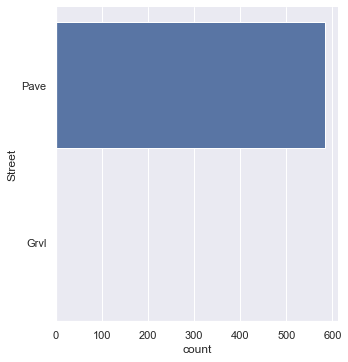

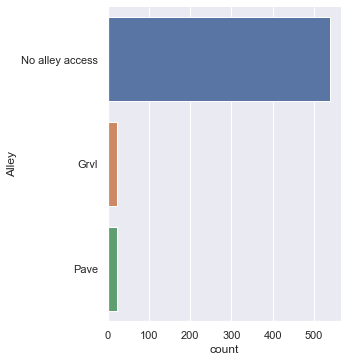

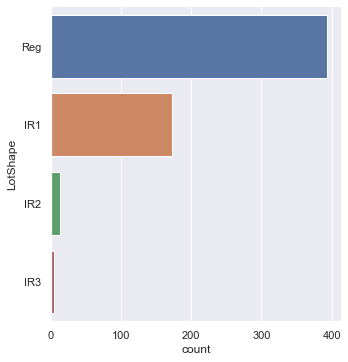

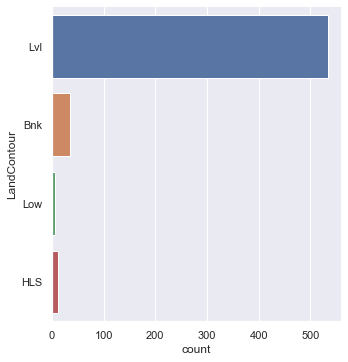

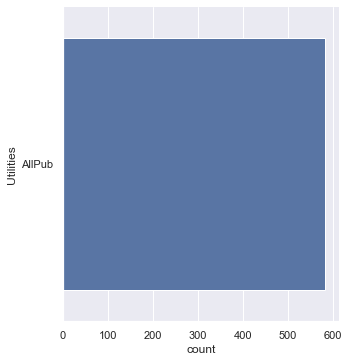

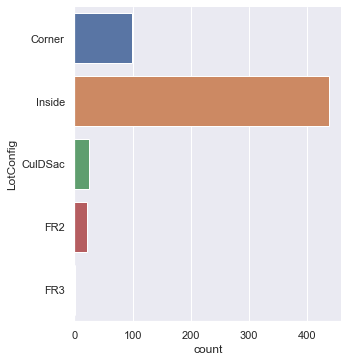

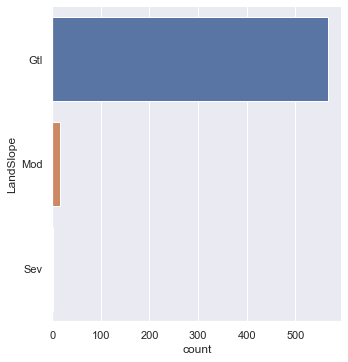

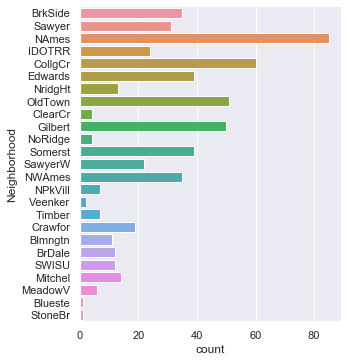

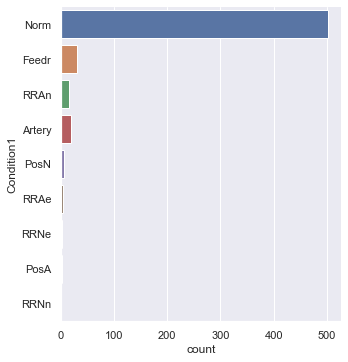

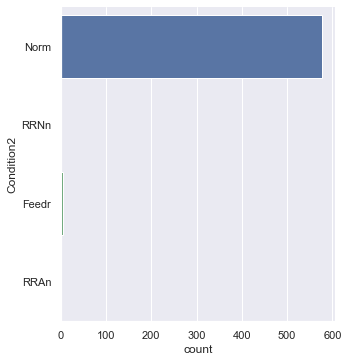

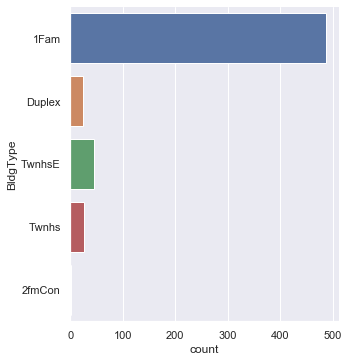

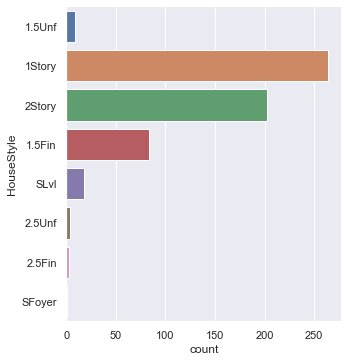

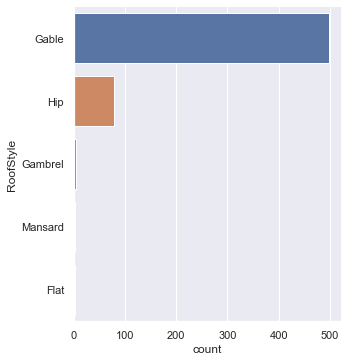

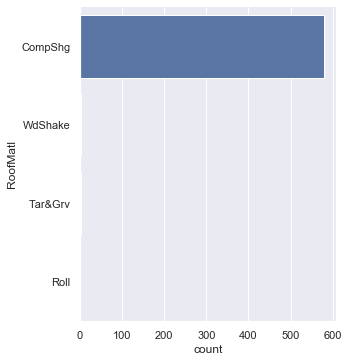

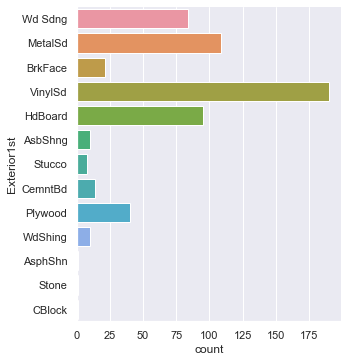

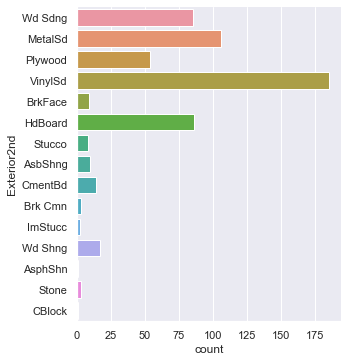

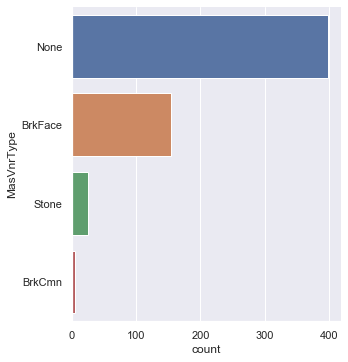

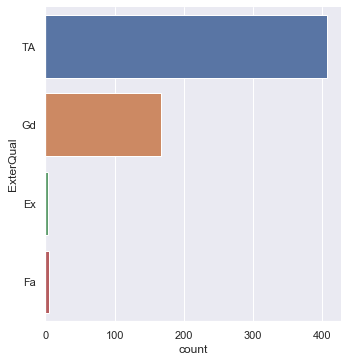

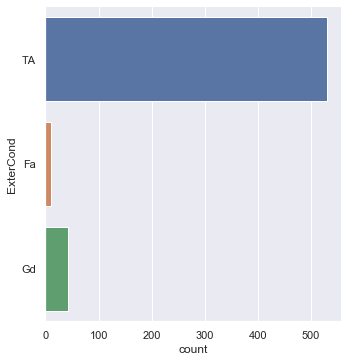

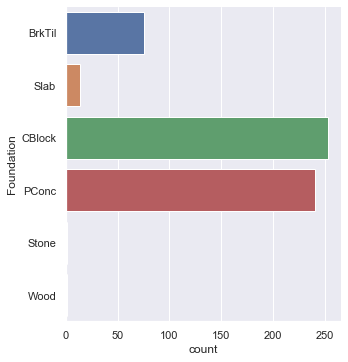

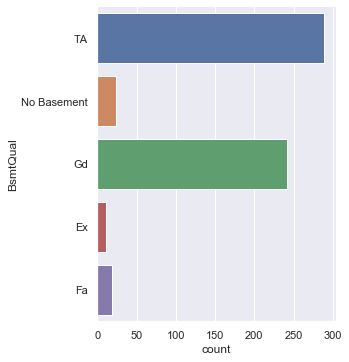

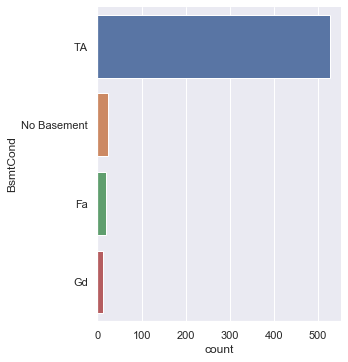

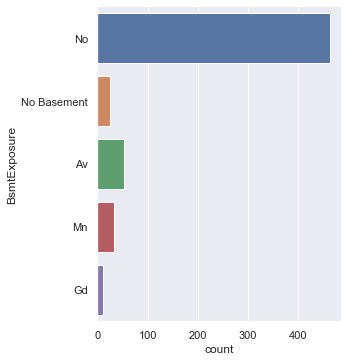

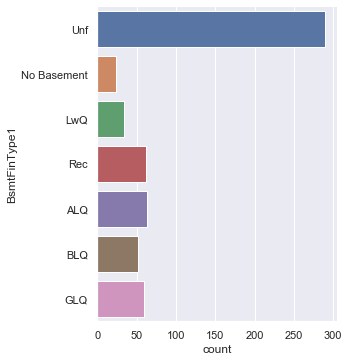

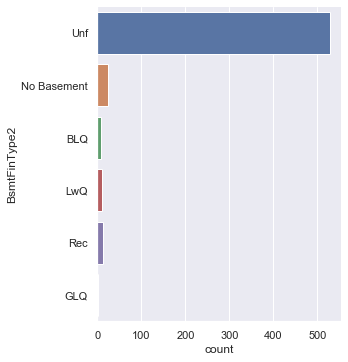

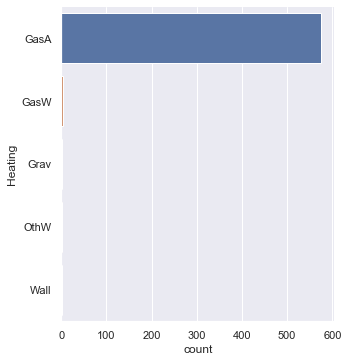

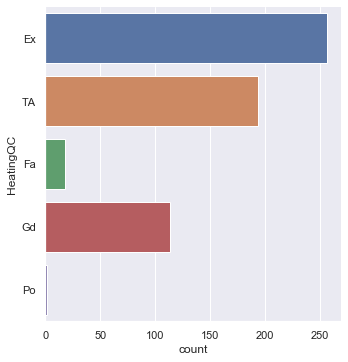

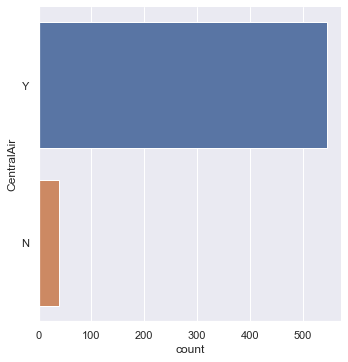

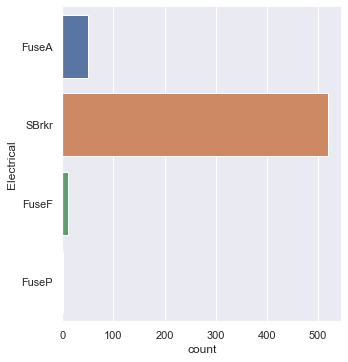

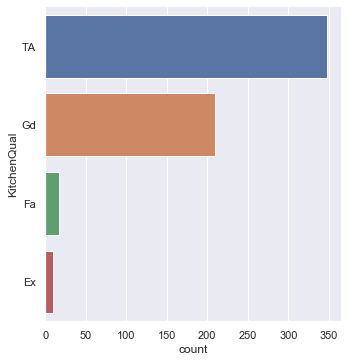

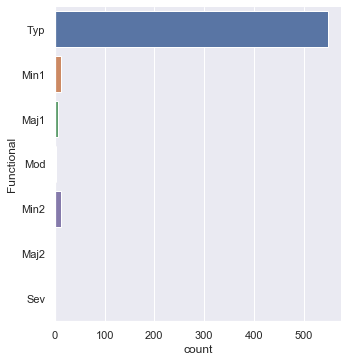

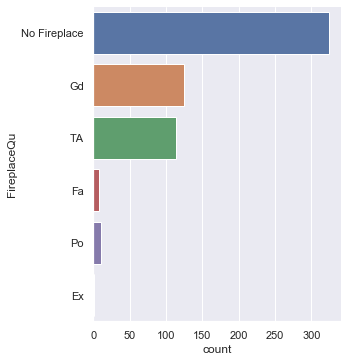

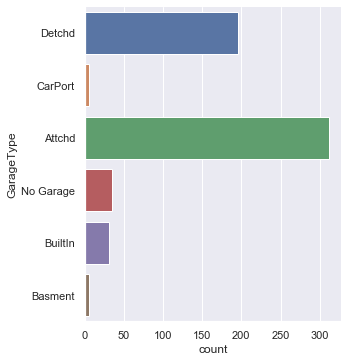

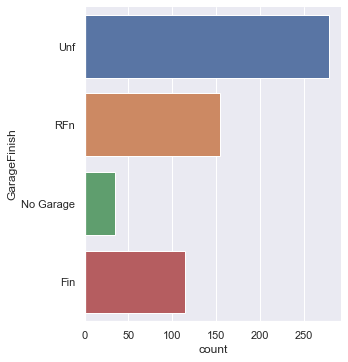

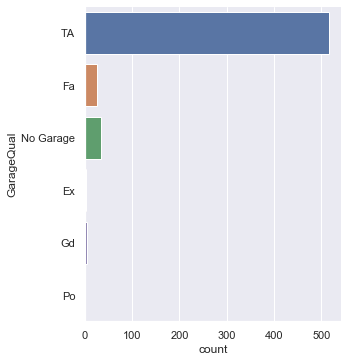

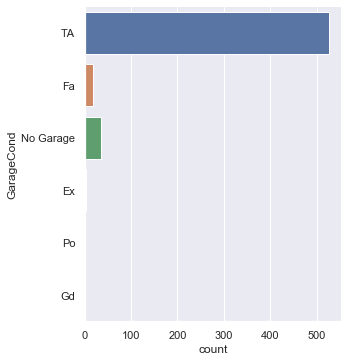

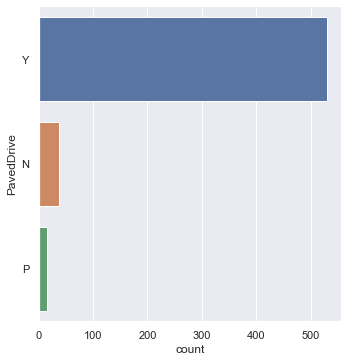

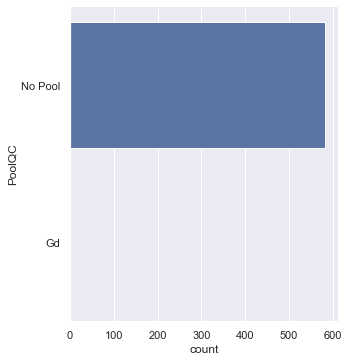

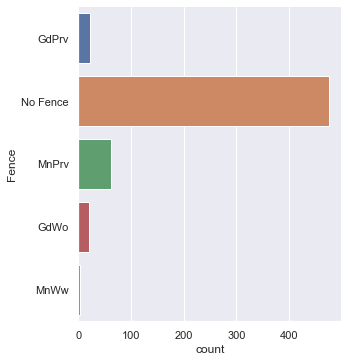

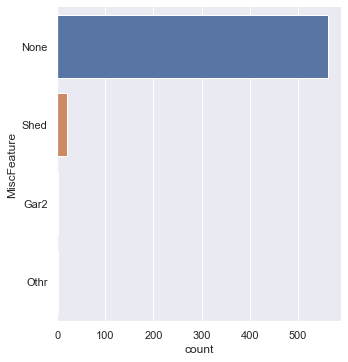

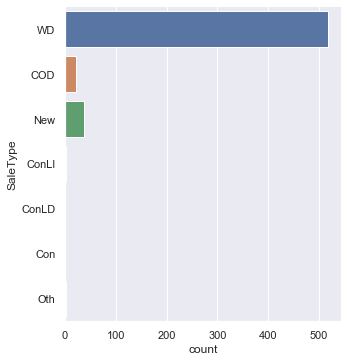

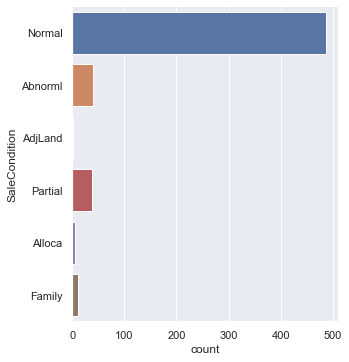

In [33]:
#Univariate Analysis of categorical Columns
for c in categorical_column:
  cat_col_univariate_analysis(c)

It could be seen that few columns have very large percentage of inclination towards a single value i.e. they are highly skewed. So, our model won't learn from such columns. It's better to remove them.<br>
Also, Columns are not normally distributed infact some columns are highly skewed so scaling is necessary.

In [35]:
categorical_column = data.select_dtypes(exclude =['number'])
data[list(categorical_column)].describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,584,584,584,584,584,584,584,584,584,584,...,584,584,584,584,584,584,584,584,584,584
unique,5,2,3,4,4,1,5,3,25,9,...,6,4,6,6,3,2,5,4,7,6
top,RL,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,No Pool,No Fence,None,WD,Normal
freq,430,583,539,394,533,584,437,566,85,502,...,312,279,516,527,530,583,475,562,518,486


In [36]:
# Creating a dummy variables for all categorical column and dropping the first level.
dummy=pd.get_dummies(categorical_column)

# Adding these dummies to our original dataset
data=pd.concat([data,dummy],axis=1)

# We have created dummies for below categories hence removing the original column
data=data.drop(categorical_column,1)
data.shape

(584, 278)

In [37]:
#Handling year column

# Deriving age of the House from YearBuilt column"
d0 = pd.datetime.now().year
d1 = data['YearBuilt']
delta = d0 - d1
data['Age_of_house']= delta
data = data.drop(columns = ['YearBuilt'],axis=1)

# Deriving remodel age from column YearRemodAdd "
d0 = pd.datetime.now().year
d1 = data['YearRemodAdd']
delta = d0 - d1
data['Remodel_Age']= delta
data = data.drop(columns = ['YearRemodAdd'],axis=1)

# Deriving age of garage from the column GarageYrBlt "
d0 = pd.datetime.now().year
d1 = data['GarageYrBlt']
delta = d0 - d1
data['Garage_Age']= delta
data = data.drop(columns = ['GarageYrBlt'],axis=1)

data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Age_of_house,Remodel_Age,Garage_Age
15,45,51.0,6120,7,8,0.0,0,0,832,832,...,1,0,0,0,0,1,0,91,19,29.0
17,90,72.0,10791,4,5,0.0,0,0,0,0,...,1,0,0,0,0,1,0,53,53,53.0
19,20,70.0,7560,5,6,0.0,504,0,525,1029,...,0,1,0,0,0,0,0,62,55,62.0
21,45,57.0,7449,7,7,0.0,0,0,637,637,...,1,0,0,0,0,1,0,90,70,90.0
22,20,75.0,9742,8,5,281.0,0,0,1777,1777,...,1,0,0,0,0,1,0,18,18,18.0


<Figure size 1440x864 with 0 Axes>

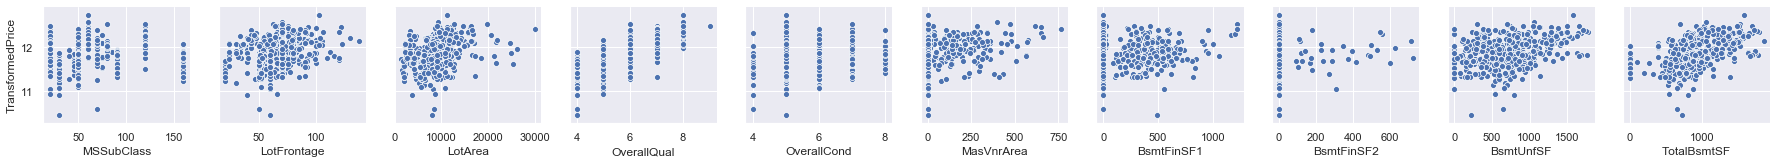

<Figure size 1440x864 with 0 Axes>

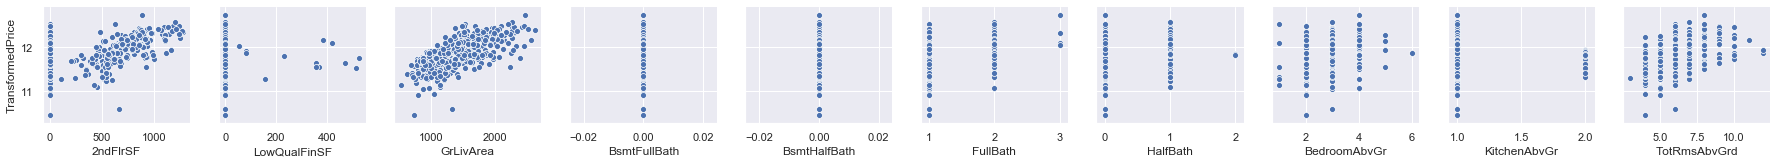

<Figure size 1440x864 with 0 Axes>

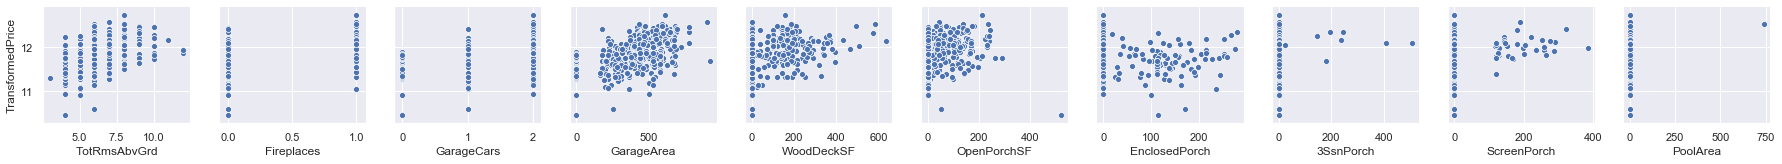

<Figure size 1440x864 with 0 Axes>

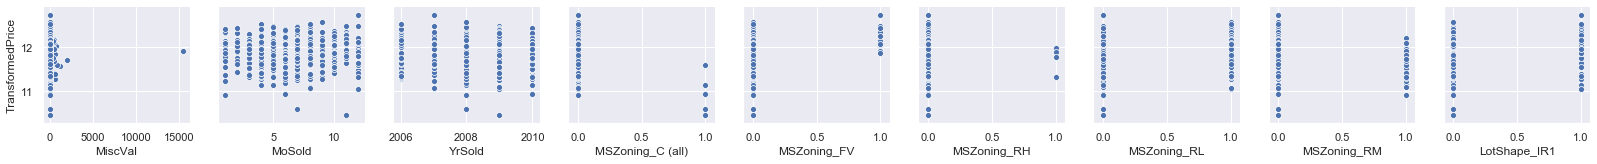

In [38]:
#Visualising few numeric variable with the target/dependent variables 
plt.figure(figsize=(20,12))
sns.pairplot(x_vars = ['MSSubClass','LotFrontage','LotArea','OverallQual','OverallCond','MasVnrArea','BsmtFinSF1',
'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF'],y_vars = 'TransformedPrice',data=data)
plt.show()

plt.figure(figsize=(20,12))
sns.pairplot(x_vars = ['2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath','BsmtHalfBath','FullBath',
'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd'],y_vars = 'TransformedPrice',data=data)
plt.show()

plt.figure(figsize=(20,12))
sns.pairplot(x_vars = ['TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea','WoodDeckSF','OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea'],y_vars = 'TransformedPrice',data=data)
plt.show()

plt.figure(figsize=(20,12))
sns.pairplot(x_vars = ['MiscVal', 'MoSold', 'YrSold','MSZoning_C (all)',
'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM','LotShape_IR1'],y_vars = 'TransformedPrice',data=data)
plt.show()


## Data Preparation

Since, the number of variables are too much. We will go for Recursive Feature elimination first and select top 50 variables that contribute high in prediction of sales price.

In [39]:
#Splitting the dataset into train and test data in 7:3 ratio 
df_train,df_test=train_test_split(data,train_size=0.7,test_size=0.3,random_state=100)

In [40]:
#Storing the independent features in X_train and X_test and dependent feature in y_train and y_test
y_train=df_train.pop('TransformedPrice')
X_train=df_train
y_test=df_test.pop('TransformedPrice')
X_test=df_test

In [41]:
#Scaling the numeric features using StandardScaler using fit_transform on the train data
scaler=StandardScaler()
X_train[X_train.columns]=scaler.fit_transform(X_train)
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Age_of_house,Remodel_Age,Garage_Age
1284,-0.140064,-0.844889,0.228829,0.196836,1.364913,-0.500619,-0.756321,-0.206484,0.277779,-0.298192,...,0.347677,-0.266207,-0.049568,-0.099504,-0.132123,0.443262,-0.271448,1.610132,-0.403484,0.334782
76,-0.919331,0.333134,-0.092280,-1.670817,1.364913,-0.500619,0.127249,-0.206484,0.077684,0.135197,...,0.347677,-0.266207,-0.049568,-0.099504,-0.132123,0.443262,-0.271448,0.372275,1.160398,0.842846
487,-0.919331,0.330198,0.948080,-0.736991,0.346843,-0.500619,3.111234,-0.206484,-0.517598,1.693057,...,0.347677,-0.266207,-0.049568,-0.099504,-0.132123,0.443262,-0.271448,-0.129558,0.470450,0.256618
402,-0.659575,-0.257345,0.384000,-0.736991,2.382984,-0.500619,-0.756321,-0.206484,-0.052378,-0.684729,...,0.347677,-0.266207,-0.049568,-0.099504,-0.132123,0.443262,-0.271448,0.907565,-0.725460,1.468156
68,-0.659575,-1.021152,-1.159973,-1.670817,0.346843,-0.500619,-0.756321,-0.206484,0.135211,-0.465106,...,0.347677,-0.266207,-0.049568,-0.099504,-0.132123,0.443262,-0.271448,0.740287,1.436377,1.272746


In [42]:
#Scaling the numeric features using StandardScaler using transform on the test data
X_test[X_test.columns]=scaler.transform(X_test)
X_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Age_of_house,Remodel_Age,Garage_Age
725,-0.919331,-0.257345,-0.510577,-1.670817,0.346843,-0.500619,0.696919,2.577621,-1.107878,-0.122494,...,0.347677,-0.266207,-0.049568,-0.099504,-0.132123,0.443262,-0.271448,-0.096103,0.516446,-0.446855
973,-0.919331,1.799057,0.781313,1.130663,-0.671228,-0.500619,-0.756321,-0.206484,1.838518,1.529072,...,-2.876235,-0.266207,-0.049568,-0.099504,-0.132123,-2.256004,3.683942,-1.333959,-1.231422,-1.150328
377,0.119691,2.210338,0.644365,2.064489,-0.671228,-0.500619,-0.756321,-0.206484,2.218698,1.974175,...,0.347677,-0.266207,-0.049568,-0.099504,-0.132123,0.443262,-0.271448,-1.233593,-1.093432,-1.033083
275,-0.140064,-0.551117,-0.426641,1.130663,1.364913,-0.500619,-0.756321,-0.206484,0.647954,0.135197,...,0.347677,-0.266207,-0.049568,-0.099504,-0.132123,0.443262,-0.271448,1.409398,-1.185425,-0.016955
371,-0.140064,0.917742,2.294638,-1.670817,-1.689299,-0.500619,-0.756321,-0.206484,-1.733174,-2.652552,...,0.347677,-0.266207,-0.049568,-0.099504,-0.132123,0.443262,-0.271448,0.271909,1.022408,-0.525019


In [43]:
# Running RFE with the output number of the variable equal to 50
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 70)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [44]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 189),
 ('LotFrontage', False, 204),
 ('LotArea', False, 186),
 ('OverallQual', False, 185),
 ('OverallCond', False, 184),
 ('MasVnrArea', False, 206),
 ('BsmtFinSF1', False, 181),
 ('BsmtFinSF2', False, 183),
 ('BsmtUnfSF', False, 182),
 ('TotalBsmtSF', False, 179),
 ('1stFlrSF', False, 176),
 ('2ndFlrSF', False, 177),
 ('LowQualFinSF', False, 178),
 ('GrLivArea', False, 175),
 ('BsmtFullBath', False, 174),
 ('BsmtHalfBath', False, 173),
 ('FullBath', False, 195),
 ('HalfBath', False, 192),
 ('BedroomAbvGr', False, 187),
 ('KitchenAbvGr', False, 172),
 ('TotRmsAbvGrd', False, 191),
 ('Fireplaces', False, 171),
 ('GarageCars', False, 194),
 ('GarageArea', False, 188),
 ('WoodDeckSF', False, 198),
 ('OpenPorchSF', False, 196),
 ('EnclosedPorch', False, 203),
 ('3SsnPorch', False, 200),
 ('ScreenPorch', False, 197),
 ('PoolArea', False, 35),
 ('MiscVal', False, 199),
 ('MoSold', False, 193),
 ('YrSold', False, 202),
 ('MSZoning_C (all)', False, 162),
 ('MSZoning_FV'

In [45]:
col = X_train.columns[rfe.support_]
col

Index(['LotConfig_FR3', 'Neighborhood_StoneBr', 'Condition1_RRNn',
       'Condition2_Feedr', 'Condition2_Norm', 'Condition2_RRAn',
       'BldgType_1Fam', 'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs',
       'BldgType_TwnhsE', 'RoofStyle_Flat', 'RoofMatl_Roll',
       'RoofMatl_Tar&Grv', 'Exterior1st_AsphShn', 'Exterior1st_CemntBd',
       'Exterior1st_Stone', 'Exterior2nd_AsphShn', 'Exterior2nd_CmentBd',
       'ExterCond_Fa', 'ExterCond_Gd', 'ExterCond_TA', 'Foundation_Wood',
       'BsmtQual_Ex', 'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_No Basement',
       'BsmtQual_TA', 'BsmtCond_Fa', 'BsmtCond_Gd', 'BsmtCond_No Basement',
       'BsmtCond_TA', 'BsmtExposure_Av', 'BsmtExposure_Gd', 'BsmtExposure_Mn',
       'BsmtExposure_No', 'BsmtExposure_No Basement',
       'BsmtFinType1_No Basement', 'BsmtFinType2_GLQ', 'Heating_GasA',
       'Heating_GasW', 'Heating_Grav', 'Heating_OthW', 'Heating_Wall',
       'CentralAir_N', 'CentralAir_Y', 'Functional_Maj1', 'Functional_Min1',
  

In [46]:
X_train = X_train[col]
X_test = X_test[col]

## Model Building and Evaluation

## Ridge Regression

In [47]:
#performing GridSearch Cross Validation for Ridge regression
ridge=Ridge(random_state=100)
params ={'alpha':[0.00001,0.0001, 0.001, 0.01, 0.05, 0.1, 
0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0,20.0,30.0,40.0,50.0,60.0,70.0,80.0,100.0,200.0,500.0,800,1000,4000,8000,10000]}
model_ridge_cv=GridSearchCV(estimator=ridge,param_grid=params,cv=5,scoring='r2',return_train_score=True,verbose=1)
model_ridge_cv.fit(X_train,y_train)

Fitting 5 folds for each of 39 candidates, totalling 195 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 195 out of 195 | elapsed:    1.9s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=100,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.05, 0.1, 0.2,
                                   0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0,
                                   3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0,
                                   20.0, 30.0, 40.0, 50.0, 60.0, 70.0, ...]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [48]:
#Observing Results of GridSearch Cross validation
model_ridge_results=pd.DataFrame(model_ridge_cv.cv_results_)
model_ridge_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004396,0.001496,0.002000,0.000893,1e-05,{'alpha': 1e-05},0.430388,0.591049,0.500694,0.491569,...,0.512398,0.054471,33,0.669154,0.653363,0.663423,0.666603,0.662286,0.662966,0.005374
1,0.004998,0.001672,0.002598,0.001019,0.0001,{'alpha': 0.0001},0.430388,0.591049,0.500694,0.491569,...,0.512398,0.054471,32,0.669154,0.653363,0.663423,0.666603,0.662286,0.662966,0.005374
2,0.006198,0.001165,0.002597,0.000491,0.001,{'alpha': 0.001},0.430389,0.591050,0.500695,0.491570,...,0.512399,0.054471,31,0.669154,0.653363,0.663423,0.666603,0.662286,0.662966,0.005374
3,0.005199,0.001166,0.001398,0.000490,0.01,{'alpha': 0.01},0.430393,0.591054,0.500703,0.491579,...,0.512404,0.054470,30,0.669154,0.653363,0.663423,0.666603,0.662286,0.662966,0.005374
4,0.007997,0.002364,0.003597,0.000490,0.05,{'alpha': 0.05},0.430411,0.591075,0.500737,0.491621,...,0.512428,0.054466,29,0.669154,0.653363,0.663423,0.666603,0.662286,0.662966,0.005374
5,0.007996,0.002189,0.003597,0.000799,0.1,{'alpha': 0.1},0.430433,0.591101,0.500780,0.491673,...,0.512458,0.054462,28,0.669154,0.653363,0.663423,0.666603,0.662285,0.662966,0.005374
6,0.005797,0.002038,0.003397,0.000799,0.2,{'alpha': 0.2},0.430478,0.591153,0.500866,0.491778,...,0.512518,0.054453,27,0.669154,0.653363,0.663423,0.666603,0.662285,0.662966,0.005374
7,0.005397,0.001742,0.002198,0.001165,0.3,{'alpha': 0.3},0.430523,0.591204,0.500951,0.491882,...,0.512577,0.054445,26,0.669154,0.653362,0.663423,0.666603,0.662285,0.662966,0.005374
8,0.005796,0.001166,0.002799,0.000748,0.4,{'alpha': 0.4},0.430568,0.591256,0.501037,0.491986,...,0.512637,0.054436,25,0.669154,0.653362,0.663423,0.666603,0.662285,0.662965,0.005374
9,0.006995,0.000894,0.002798,0.000748,0.5,{'alpha': 0.5},0.430612,0.591307,0.501122,0.492089,...,0.512696,0.054428,24,0.669154,0.653362,0.663422,0.666603,0.662285,0.662965,0.005374


In [49]:
#Chosing specific columns which we are interested in
model_results=pd.DataFrame(model_ridge_cv.cv_results_)
model_results[['param_alpha','mean_train_score','mean_test_score']]

,param_alpha,mean_train_score,mean_test_score
0,1e-05,0.662966,0.512398
1,0.0001,0.662966,0.512398
2,0.001,0.662966,0.512399
3,0.01,0.662966,0.512404
4,0.05,0.662966,0.512428
5,0.1,0.662966,0.512458
6,0.2,0.662966,0.512518
7,0.3,0.662966,0.512577
8,0.4,0.662965,0.512637
9,0.5,0.662965,0.512696


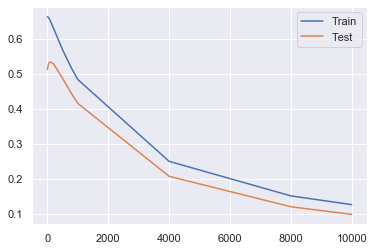

In [50]:
#ploting r2 vs alpha to find the optimum alpha or lambda
plt.plot(model_ridge_results['param_alpha'],model_ridge_results['mean_train_score'],label='Train')
plt.plot(model_ridge_results['param_alpha'],model_ridge_results['mean_test_score'],label='Test')
plt.legend()

**Since the above plot is not clear we will replot it with alpha less than 5000**

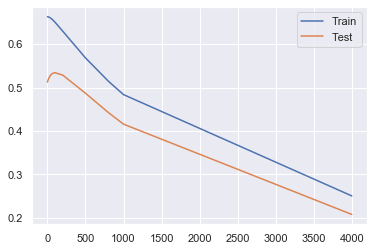

In [51]:
#Reploting with alpha less than 5000
plt.plot(model_ridge_results.loc[model_ridge_results['param_alpha'].between(0,5000),'param_alpha'],model_ridge_results.loc[model_ridge_results['param_alpha'].between(0,5000),'mean_train_score'],label='Train')
plt.plot(model_ridge_results.loc[model_ridge_results['param_alpha'].between(0,5000),'param_alpha'],model_ridge_results.loc[model_ridge_results['param_alpha'].between(0,5000),'mean_test_score'],label='Test')
plt.legend()

In [52]:
model_ridge_cv.best_params_

{'alpha': 100.0}

In [53]:
#Rebuilding the model with best alpha=70
ridge=Ridge(alpha=100)
ridge.fit(X_train,y_train)
coeff=pd.DataFrame([X_train.columns,ridge.coef_]).T
coeff.columns=['Variables','Coeeficients']
coeff.sort_values(by='Coeeficients',ascending=False)
#coefficients of the variables

,Variables,Coeeficients
25,BsmtQual_Gd,0.0553549
51,GarageFinish_Fin,0.0350725
23,BsmtQual_Ex,0.0334514
53,GarageFinish_RFn,0.0313926
8,BldgType_Duplex,0.0207338
45,CentralAir_Y,0.0200301
40,Heating_GasW,0.0151204
6,BldgType_1Fam,0.012678
56,GarageCond_Gd,0.0115029
11,RoofStyle_Flat,0.0115029


In [54]:
#Top 10 varaibles affecting the SalesPrice positively
coeff.sort_values(by='Coeeficients',ascending=False).head(10)

,Variables,Coeeficients
25,BsmtQual_Gd,0.0553549
51,GarageFinish_Fin,0.0350725
23,BsmtQual_Ex,0.0334514
53,GarageFinish_RFn,0.0313926
8,BldgType_Duplex,0.0207338
45,CentralAir_Y,0.0200301
40,Heating_GasW,0.0151204
6,BldgType_1Fam,0.012678
56,GarageCond_Gd,0.0115029
11,RoofStyle_Flat,0.0115029


In [55]:
#Top 10 varaibles affecting the SalesPrice negeatively
coeff.sort_values(by='Coeeficients',ascending=False).tail(10)

,Variables,Coeeficients
9,BldgType_Twnhs,-0.0130163
67,SaleCondition_Family,-0.0144506
57,PavedDrive_N,-0.0160079
44,CentralAir_N,-0.0200301
10,BldgType_TwnhsE,-0.0235735
55,GarageQual_No Garage,-0.0255334
52,GarageFinish_No Garage,-0.0255334
24,BsmtQual_Fa,-0.032339
54,GarageFinish_Unf,-0.0425121
27,BsmtQual_TA,-0.047167


In [56]:
print("Number of variables selected by ridge model:",np.count_nonzero(coeff.Coeeficients))

Number of variables selected by ridge model: 66


### Testing on Test Dataset

In [57]:
#Calculating the r2
y_pred_train=ridge.predict(X_train)
print("The r2 score for train dataset is : ",r2_score(y_train,y_pred_train))
y_pred_test=ridge.predict(X_test)
print("The r2 score for test dataset is : ",r2_score(y_test,y_pred_test))

The r2 score for train dataset is :  0.6447200613501725
The r2 score for test dataset is :  0.5166467585143393


## Lasso Regression

In [58]:
#performing GridSearch Cross Validation for lasso regression
lasso=Lasso()
params = {'alpha': [0.0001,0.005,0.002, 0.001, 0.01, 0.02, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20]}
model_lasso_cv=GridSearchCV(estimator=lasso,param_grid=params,cv=5,scoring='r2',return_train_score=True,verbose=1)
model_lasso_cv.fit(X_train,y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    1.7s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.005, 0.002, 0.001, 0.01, 0.02,
                                   0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                   0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,
                                   9.0, 10.0, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [59]:
#Observing Results of GridSearch Cross validation
model_results=pd.DataFrame(model_lasso_cv.cv_results_)
model_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.047972,0.005018,0.002800,0.000749,0.0001,{'alpha': 0.0001},0.427396,0.592381,0.502531,0.492543,...,0.512584,0.055597,6,0.669149,0.653358,0.663417,0.666596,0.662280,0.662960,0.005374
1,0.007794,0.000400,0.002199,0.000399,0.005,{'alpha': 0.005},0.455475,0.600662,0.559131,0.523743,...,0.529742,0.048810,2,0.660705,0.643684,0.653071,0.656722,0.652131,0.653263,0.005665
2,0.012991,0.001672,0.001801,0.000748,0.002,{'alpha': 0.002},0.445340,0.598118,0.531916,0.505470,...,0.523665,0.049639,3,0.667236,0.651500,0.661426,0.664568,0.660294,0.661005,0.005340
3,0.024385,0.003610,0.002199,0.001166,0.001,{'alpha': 0.001},0.437027,0.596134,0.517025,0.499635,...,0.518658,0.052354,5,0.668670,0.652880,0.662890,0.666047,0.661745,0.662447,0.005365
4,0.006596,0.001356,0.002599,0.000799,0.01,{'alpha': 0.01},0.469730,0.597937,0.586849,0.535492,...,0.536385,0.050683,1,0.644758,0.622405,0.629880,0.635417,0.637768,0.634045,0.007528
5,0.005197,0.000980,0.001998,0.000632,0.02,{'alpha': 0.02},0.461898,0.573462,0.601079,0.517790,...,0.521256,0.059283,4,0.602372,0.567771,0.568956,0.588222,0.594186,0.584301,0.013772
6,0.005197,0.001599,0.003198,0.000748,0.05,{'alpha': 0.05},0.387868,0.453051,0.483277,0.443287,...,0.425450,0.045213,7,0.474198,0.436256,0.434806,0.460788,0.474237,0.456057,0.017468
7,0.004798,0.001325,0.002598,0.000489,0.1,{'alpha': 0.1},0.199052,0.205588,0.224545,0.221129,...,0.212367,0.009488,8,0.226409,0.214988,0.202823,0.225600,0.253084,0.224581,0.016627
8,0.004996,0.001095,0.002398,0.000490,0.2,{'alpha': 0.2},-0.002276,-0.000598,-0.030060,-0.016489,...,-0.010000,0.011694,9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.005597,0.001019,0.002599,0.000489,0.3,{'alpha': 0.3},-0.002276,-0.000598,-0.030060,-0.016489,...,-0.010000,0.011694,9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [60]:
#Chosing specific columns which we are interested in
model_results=pd.DataFrame(model_lasso_cv.cv_results_)
model_results[['param_alpha','mean_train_score','mean_test_score']]

,param_alpha,mean_train_score,mean_test_score
0,0.0001,0.662960,0.512584
1,0.005,0.653263,0.529742
2,0.002,0.661005,0.523665
3,0.001,0.662447,0.518658
4,0.01,0.634045,0.536385
5,0.02,0.584301,0.521256
6,0.05,0.456057,0.425450
7,0.1,0.224581,0.212367
8,0.2,0.000000,-0.010000
9,0.3,0.000000,-0.010000


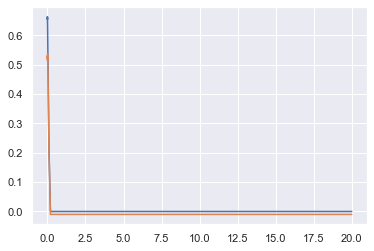

In [61]:
#plotting r2 vs lambda to find the optimum lambda(alpha)
plt.plot(model_results['param_alpha'],model_results['mean_train_score'])
plt.plot(model_results['param_alpha'],model_results['mean_test_score'])

In [62]:
#finding optimum alpha or lambda
model_lasso_cv.best_params_

{'alpha': 0.01}

In [63]:
#fitting the model with alpha=0.01
lasso=Lasso(alpha=0.01)
lasso.fit(X_train,y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [64]:
#getting the coefficients of the variables
pd.set_option('max_rows',300)
coeff=pd.DataFrame([X_train.columns,lasso.coef_]).T
coeff.columns=['Variables','Coeeficients']
coeff.sort_values(by='Coeeficients',ascending=False)

,Variables,Coeeficients
25,BsmtQual_Gd,0.112702
23,BsmtQual_Ex,0.0492851
11,RoofStyle_Flat,0.0148224
40,Heating_GasW,0.00965896
16,Exterior1st_Stone,0.00777765
51,GarageFinish_Fin,0.00603499
38,BsmtFinType2_GLQ,0.00461067
31,BsmtCond_TA,0.00457553
56,GarageCond_Gd,0.00311067
8,BldgType_Duplex,0.00189174


In [65]:
pd.set_option('max_rows',1000)
coeff.sort_values(by='Coeeficients',ascending=False).head(10)
#Top 10 features which are influencing target variable positively

,Variables,Coeeficients
25,BsmtQual_Gd,0.112702
23,BsmtQual_Ex,0.0492851
11,RoofStyle_Flat,0.0148224
40,Heating_GasW,0.00965896
16,Exterior1st_Stone,0.00777765
51,GarageFinish_Fin,0.00603499
38,BsmtFinType2_GLQ,0.00461067
31,BsmtCond_TA,0.00457553
56,GarageCond_Gd,0.00311067
8,BldgType_Duplex,0.00189174


In [66]:
pd.set_option('max_rows',1000)
coeff.sort_values(by='Coeeficients',ascending=False).tail(10)
#Top 10 features which are influencing target variable negeatively

,Variables,Coeeficients
15,Exterior1st_CemntBd,-0.00934044
24,BsmtQual_Fa,-0.0132796
63,MiscFeature_Shed,-0.0148247
9,BldgType_Twnhs,-0.0178967
57,PavedDrive_N,-0.0228422
55,GarageQual_No Garage,-0.023384
10,BldgType_TwnhsE,-0.0279671
44,CentralAir_N,-0.0390858
52,GarageFinish_No Garage,-0.0416644
54,GarageFinish_Unf,-0.0777224


In [67]:
#number of features selected by model
print('Number of Features selected by Lasso Model :',np.count_nonzero(coeff.Coeeficients))

Number of Features selected by Lasso Model : 29


## Testing on Test dataset

In [68]:
#Calculating the r2
y_pred_train=lasso.predict(X_train)
print("The r2 score for train dataset is : ",r2_score(y_train,y_pred_train))
y_pred_test=lasso.predict(X_test)
print("The r2 score for test dataset is : ",r2_score(y_test,y_pred_test))

The r2 score for train dataset is :  0.622564629516076
The r2 score for test dataset is :  0.5042715726415764


## Choosing the Best Model

- Lasso and Ridge are performs same but better than Standard Linear model 
- Now we need to choose between Lasso and Ridge
- `Lasso is better than Ridge` since Lasso has built a model with 131 features ,ridge has built a model with 226 features Lasso is much simpler than Ridge but almost performing same or better than ridge so `going for Lasso`

**We can observe that some features coefficients reduced to 0 that is one of the best part of lasso since it acts also as feature selection because feature whose coefficint is 0 it means it's not affecting the model significantly so we can ignore them** 

## Question 1 : What will be the changes in the model if you choose double the value of alpha for both ridge and lasso?

In [69]:
#fitting the model with alpha=0.02
lasso=Lasso(alpha=0.02)
lasso.fit(X_train,y_train)

Lasso(alpha=0.02, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [70]:
#Calculating the r2
y_pred_train=lasso.predict(X_train)
print("The r2 score for train dataset is : ",r2_score(y_train,y_pred_train))
y_pred_test=lasso.predict(X_test)
print("The r2 score for test dataset is : ",r2_score(y_test,y_pred_test))

The r2 score for train dataset is :  0.5717980086409316
The r2 score for test dataset is :  0.467120782985999


In [71]:
#fitting the model with alpha=500
ridge=Ridge(alpha=200)
ridge.fit(X_train,y_train)

Ridge(alpha=200, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [72]:
#Calculating the r2
y_pred_train=ridge.predict(X_train)
print("The r2 score for train dataset is : ",r2_score(y_train,y_pred_train))
y_pred_test=ridge.predict(X_test)
print("The r2 score for test dataset is : ",r2_score(y_test,y_pred_test))

The r2 score for train dataset is :  0.6296876549586903
The r2 score for test dataset is :  0.5058096645673271


In [73]:
#getting the coefficients of the variables
pd.set_option('max_rows',300)
coeff=pd.DataFrame([X_train.columns,lasso.coef_]).T
coeff.columns=['Variables','Coeeficients']
coeff.sort_values(by='Coeeficients',ascending=False)

,Variables,Coeeficients
25,BsmtQual_Gd,0.10871
23,BsmtQual_Ex,0.0400995
6,BldgType_1Fam,0.00672628
51,GarageFinish_Fin,0.00620272
11,RoofStyle_Flat,0.00374456
56,GarageCond_Gd,0.00368707
38,BsmtFinType2_GLQ,0.001677
40,Heating_GasW,0.00082216
16,Exterior1st_Stone,0.000231942
31,BsmtCond_TA,0.000225502


### Question 3: After building the model, you realized that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

The top 5 predictor variables for lasso came out to be:
- BsmtQual_Gd with coefficient value 0.0112702
- BsmtQual_Ex with coefficient value 0.0492851
- RoofStyle_Flat with coefficient value 0.0148224
- HEating_GasW with coefficient value 0.00965896
- Exterior1st_stone with coefficient value 0.00777765

Removing these features from the model in order to predict new top 5 predictors

In [74]:
data_new = data.drop(['BsmtQual_Gd','BsmtQual_Ex','RoofStyle_Flat','Heating_GasW','Exterior1st_Stone'],axis=1)

In [75]:
#Splitting the dataset into train and test data in 7:3 ratio 
df_train,df_test=train_test_split(data_new,train_size=0.7,test_size=0.3,random_state=100)

In [76]:
#Storing the independent features in X_train and X_test and dependent feature in y_train and y_test
y_train=df_train.pop('TransformedPrice')
X_train=df_train
y_test=df_test.pop('TransformedPrice')
X_test=df_test

In [77]:
#Scaling the numeric features using StandardScaler using fit_transform on the train data
scaler=StandardScaler()
X_train[X_train.columns]=scaler.fit_transform(X_train)
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Age_of_house,Remodel_Age,Garage_Age
1284,-0.140064,-0.844889,0.228829,0.196836,1.364913,-0.500619,-0.756321,-0.206484,0.277779,-0.298192,...,0.347677,-0.266207,-0.049568,-0.099504,-0.132123,0.443262,-0.271448,1.610132,-0.403484,0.334782
76,-0.919331,0.333134,-0.092280,-1.670817,1.364913,-0.500619,0.127249,-0.206484,0.077684,0.135197,...,0.347677,-0.266207,-0.049568,-0.099504,-0.132123,0.443262,-0.271448,0.372275,1.160398,0.842846
487,-0.919331,0.330198,0.948080,-0.736991,0.346843,-0.500619,3.111234,-0.206484,-0.517598,1.693057,...,0.347677,-0.266207,-0.049568,-0.099504,-0.132123,0.443262,-0.271448,-0.129558,0.470450,0.256618
402,-0.659575,-0.257345,0.384000,-0.736991,2.382984,-0.500619,-0.756321,-0.206484,-0.052378,-0.684729,...,0.347677,-0.266207,-0.049568,-0.099504,-0.132123,0.443262,-0.271448,0.907565,-0.725460,1.468156
68,-0.659575,-1.021152,-1.159973,-1.670817,0.346843,-0.500619,-0.756321,-0.206484,0.135211,-0.465106,...,0.347677,-0.266207,-0.049568,-0.099504,-0.132123,0.443262,-0.271448,0.740287,1.436377,1.272746


In [78]:
#Scaling the numeric features using StandardScaler using transform on the test data
X_test[X_test.columns]=scaler.transform(X_test)
X_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Age_of_house,Remodel_Age,Garage_Age
725,-0.919331,-0.257345,-0.510577,-1.670817,0.346843,-0.500619,0.696919,2.577621,-1.107878,-0.122494,...,0.347677,-0.266207,-0.049568,-0.099504,-0.132123,0.443262,-0.271448,-0.096103,0.516446,-0.446855
973,-0.919331,1.799057,0.781313,1.130663,-0.671228,-0.500619,-0.756321,-0.206484,1.838518,1.529072,...,-2.876235,-0.266207,-0.049568,-0.099504,-0.132123,-2.256004,3.683942,-1.333959,-1.231422,-1.150328
377,0.119691,2.210338,0.644365,2.064489,-0.671228,-0.500619,-0.756321,-0.206484,2.218698,1.974175,...,0.347677,-0.266207,-0.049568,-0.099504,-0.132123,0.443262,-0.271448,-1.233593,-1.093432,-1.033083
275,-0.140064,-0.551117,-0.426641,1.130663,1.364913,-0.500619,-0.756321,-0.206484,0.647954,0.135197,...,0.347677,-0.266207,-0.049568,-0.099504,-0.132123,0.443262,-0.271448,1.409398,-1.185425,-0.016955
371,-0.140064,0.917742,2.294638,-1.670817,-1.689299,-0.500619,-0.756321,-0.206484,-1.733174,-2.652552,...,0.347677,-0.266207,-0.049568,-0.099504,-0.132123,0.443262,-0.271448,0.271909,1.022408,-0.525019


In [79]:
# Running RFE with the output number of the variable equal to 70
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 70)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [80]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

col = X_train.columns[rfe.support_]
col
X_train = X_train[col]
X_test = X_test[col]

### Building Ridge Regression

In [81]:
#performing GridSearch Cross Validation for Ridge regression
ridge=Ridge(random_state=100)
params ={'alpha':[0.00001,0.0001, 0.001, 0.01, 0.05, 0.1, 
0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0,20.0,30.0,40.0,50.0,60.0,70.0,80.0,100.0,200.0,500.0,800,1000,4000,8000,10000]}
model_ridge_cv=GridSearchCV(estimator=ridge,param_grid=params,cv=5,scoring='r2',return_train_score=True,verbose=1)
model_ridge_cv.fit(X_train,y_train)

Fitting 5 folds for each of 39 candidates, totalling 195 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 195 out of 195 | elapsed:    1.5s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=100,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.05, 0.1, 0.2,
                                   0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0,
                                   3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0,
                                   20.0, 30.0, 40.0, 50.0, 60.0, 70.0, ...]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [82]:
#Observing Results of GridSearch Cross validation
model_ridge_results=pd.DataFrame(model_ridge_cv.cv_results_)
model_ridge_results

model_ridge_cv.best_params_

{'alpha': 200.0}

In [83]:
#Rebuilding the model with best alpha=200
ridge=Ridge(alpha=200)
ridge.fit(X_train,y_train)
coeff=pd.DataFrame([X_train.columns,ridge.coef_]).T
coeff.columns=['Variables','Coeeficients']
coeff.sort_values(by='Coeeficients',ascending=False)
#coefficients of the variables

#Top 10 varaibles affecting the SalesPrice positively
coeff.sort_values(by='Coeeficients',ascending=False).head(10)

#Top 10 varaibles affecting the SalesPrice negeatively
coeff.sort_values(by='Coeeficients',ascending=False).tail(10)

#Top 10 varaibles affecting the SalesPrice negeatively
coeff.sort_values(by='Coeeficients',ascending=False).tail(10)


,Variables,Coeeficients
53,GarageCond_No Garage,-0.00966708
21,RoofStyle_Gable,-0.0099224
37,BsmtCond_Fa,-0.0129178
44,Functional_Maj1,-0.0133628
54,PavedDrive_N,-0.0173331
42,CentralAir_N,-0.0185466
6,LotShape_Reg,-0.0200558
64,SaleType_COD,-0.0206957
32,ExterQual_Fa,-0.0231985
34,ExterQual_TA,-0.0498214


In [84]:
pd.set_option('max_rows',1000)
coeff.sort_values(by='Coeeficients',ascending=False).head(10)
#Top 10 features which are influencing target variable positively

,Variables,Coeeficients
33,ExterQual_Gd,0.0521358
43,CentralAir_Y,0.0185466
3,LotShape_IR1,0.0162517
67,SaleType_New,0.0161148
52,GarageQual_TA,0.0159352
65,SaleType_Con,0.0146023
56,PavedDrive_Y,0.013354
31,ExterQual_Ex,0.011849
22,RoofStyle_Gambrel,0.0114104
39,BsmtCond_TA,0.0104576


### Building Lasso Model

In [85]:
#performing GridSearch Cross Validation for lasso regression
lasso=Lasso()
params = {'alpha': [0.0001,0.005,0.002, 0.001, 0.01, 0.02, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20]}
model_lasso_cv=GridSearchCV(estimator=lasso,param_grid=params,cv=5,scoring='r2',return_train_score=True,verbose=1)
model_lasso_cv.fit(X_train,y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    1.3s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.005, 0.002, 0.001, 0.01, 0.02,
                                   0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                   0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,
                                   9.0, 10.0, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [86]:
#Observing Results of GridSearch Cross validation
model_lasso_results=pd.DataFrame(model_lasso_cv.cv_results_)
model_lasso_results

model_ridge_cv.best_params_

{'alpha': 200.0}

In [87]:
#Rebuilding the model with best alpha=200
lasso=Lasso(alpha=200)
lasso.fit(X_train,y_train)
coeff=pd.DataFrame([X_train.columns,lasso.coef_]).T
coeff.columns=['Variables','Coeeficients']
coeff.sort_values(by='Coeeficients',ascending=False)
#coefficients of the variables

#Top 10 varaibles affecting the SalesPrice positively
coeff.sort_values(by='Coeeficients',ascending=False).head(10)

,Variables,Coeeficients
24,RoofStyle_Mansard,0
25,RoofMatl_Roll,0
26,RoofMatl_Tar&Grv,0
27,RoofMatl_WdShake,0
28,Exterior1st_AsphShn,-0
29,Exterior2nd_AsphShn,-0
30,Exterior2nd_CBlock,0
31,ExterQual_Ex,0
32,ExterQual_Fa,-0
69,SaleType_WD,-0


In [88]:
pd.set_option('max_rows',1000)
coeff.sort_values(by='Coeeficients',ascending=False).head(10)
#Top 10 features which are influencing target variable positively

,Variables,Coeeficients
0,PoolArea,0
44,Functional_Maj1,-0
50,GarageFinish_No Garage,-0
49,GarageType_No Garage,-0
48,Functional_Typ,0
47,Functional_Mod,-0
46,Functional_Min2,-0
45,Functional_Min1,-0
43,CentralAir_Y,0
52,GarageQual_TA,0


It could be observed that the top 5 most important predictors now came out to be:
    - RoofStyle_Mansard
    - RoofMatl_Roll
    - RoofMatl_Tar
    - RoofMatl_WdShake
    - Exterior1st_AsphShn